In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset/train'
valid_path = '/content/drive/MyDrive/Dataset/test'

In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Dataset/train/*')

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 620 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 200 images belonging to 2 classes.


In [25]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-25-5932e3024fde>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
39/39 [==============================] - 156s 4s/step - loss: 2.2204 - accuracy: 0.5565 - val_loss: 2.7112 - val_accuracy: 0.5000
Epoch 2/10
39/39 [==============================] - 129s 3s/step - loss: 0.5608 - accuracy: 0.7323 - val_loss: 0.5964 - val_accuracy: 0.7950
Epoch 3/10
39/39 [==============================] - 134s 3s/step - loss: 0.5365 - accuracy: 0.7532 - val_loss: 1.2728 - val_accuracy: 0.5000
Epoch 4/10
39/39 [==============================] - 129s 3s/step - loss: 0.7379 - accuracy: 0.6806 - val_loss: 0.9750 - val_accuracy: 0.5550
Epoch 5/10
39/39 [==============================] - 134s 3s/step - loss: 0.5607 - accuracy: 0.7419 - val_loss: 0.5370 - val_accuracy: 0.6400
Epoch 6/10
39/39 [==============================] - 129s 3s/step - loss: 0.3463 - accuracy: 0.8419 - val_loss: 0.9270 - val_accuracy: 0.5000
Epoch 7/10
39/39 [==============================] - 129s 3s/step - loss: 0.5412 - accuracy: 0.7581 - val_loss: 1.1616 - val_accuracy: 0.5000
Epoch 8/10
39

In [27]:

import matplotlib.pyplot as plt

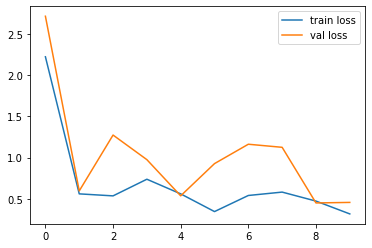

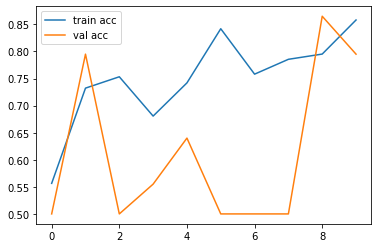

<Figure size 432x288 with 0 Axes>

In [28]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [29]:

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [30]:
y_pred = model.predict(test_set)

13/13 [==============================] - 28s 2s/step


In [31]:
y_pred

array([[0.33790874, 0.6620912 ],
       [0.78779185, 0.21220809],
       [0.5937173 , 0.40628272],
       [0.00976975, 0.99023026],
       [0.73939824, 0.26060176],
       [0.7946569 , 0.20534311],
       [0.7627901 , 0.23720986],
       [0.7712165 , 0.22878346],
       [0.76535374, 0.23464619],
       [0.79558164, 0.20441839],
       [0.7035292 , 0.29647076],
       [0.76269984, 0.23730007],
       [0.7537224 , 0.24627748],
       [0.65908927, 0.34091073],
       [0.7618157 , 0.23818432],
       [0.45768645, 0.5423135 ],
       [0.7536799 , 0.24632007],
       [0.6084676 , 0.39153236],
       [0.21550883, 0.7844912 ],
       [0.52461904, 0.47538093],
       [0.28993794, 0.7100621 ],
       [0.8088104 , 0.19118962],
       [0.13729236, 0.8627077 ],
       [0.723444  , 0.276556  ],
       [0.03906413, 0.9609359 ],
       [0.35793203, 0.64206797],
       [0.7707346 , 0.22926544],
       [0.76929903, 0.23070101],
       [0.06492101, 0.9350791 ],
       [0.7226687 , 0.2773312 ],
       [0.

In [32]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1])

In [33]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [34]:
model=load_model('model_resnet50.h5')

In [36]:
img=image.load_img('/content/drive/MyDrive/Dataset/predict/IMG_1129.JPG',target_size=(224,224))


In [37]:

x=image.img_to_array(img)
x

array([[[215., 215., 217.],
        [215., 216., 218.],
        [216., 217., 219.],
        ...,
        [212., 212., 214.],
        [212., 210., 213.],
        [210., 210., 212.]],

       [[214., 215., 217.],
        [214., 214., 216.],
        [215., 215., 217.],
        ...,
        [209., 207., 210.],
        [210., 208., 211.],
        [215., 213., 216.]],

       [[213., 214., 216.],
        [214., 214., 216.],
        [215., 215., 217.],
        ...,
        [212., 210., 213.],
        [205., 203., 206.],
        [209., 207., 210.]],

       ...,

       [[177., 176., 174.],
        [184., 183., 181.],
        [182., 181., 179.],
        ...,
        [190., 190., 190.],
        [188., 188., 190.],
        [186., 186., 188.]],

       [[186., 185., 183.],
        [184., 183., 181.],
        [176., 175., 173.],
        ...,
        [188., 188., 188.],
        [189., 189., 191.],
        [172., 172., 174.]],

       [[170., 169., 167.],
        [187., 186., 184.],
        [181., 1

In [38]:
x.shape

(224, 224, 3)

In [39]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape
     

(1, 224, 224, 3)

In [40]:
model.predict(img_data)


1/1 [==============================] - 2s 2s/step


array([[2.1196575e-31, 1.0000000e+00]], dtype=float32)

In [41]:
a=np.argmax(model.predict(img_data), axis=1)
a

1/1 [==============================] - 0s 149ms/step


array([1])

In [43]:
a==1 #means positive

array([ True])